In [1]:
# Importo las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math
import read
from scipy import stats
from kmodes.kmodes import KModes
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import nltk
import seaborn as sns

# Introducción

**Cambio Rural (CR)** es un Programa de la Secretaría de Agricultura, Ganadería y Pesca del Ministerio de Economía de la Nación, y que este año cumple 30 años de historia. Es co-ejecutado por la Coordinación de Extensión y Cambio Rural y el INTA.
Inició en 1993 y se reestructuró en 2017. El objeto de este estudio es la segunda etapa de este programa, desde 2017 a la actualidad.


## 1.	PARTE I. Estadística descriptiva.
a.	¿Qué columnas tiene?¿Qué tipo de columnas son?
b.	Análisis y aplicación de Medidas de Tendencia Central.
c.	Análisis y aplicación de Medidas de Dispersión.
d.	Análisis de covarianza entre las variables.


In [2]:
# Cargar del dataset
base = pd.DataFrame(pd.read_excel(r"C:\Users\Marian\Python/BaseCR.xlsx"))
base

,Coordinación,Provincia,Sexo,Edad,Rango_etario,Educación,Ingresos,SituacionAFIP,Caracterización,superficie
0,NOA,Jujuy,Femenino,NaN,Menor de 30,Ninguna,Menos del 30%,NaN,Productor familiar capitalizado,0
1,Patagonia,Chubut,Femenino,NaN,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,Productor familiar capitalizado,0
2,Centro,Córdoba,Femenino,NaN,Menor de 30,Ninguna,Más del 50%,Responsable Inscripto,Productor familiar capitalizado,0
3,Bs As-La Pampa,Buenos Aires,Masculino,NaN,Menor de 30,Ninguna,Más del 50%,Monotributo Cat B,Productor familiar capitalizado,0
4,Patagonia,Chubut,Masculino,NaN,Menor de 30,Ninguna,Más del 50%,Monotributo Cat C,Productor familiar capitalizado,300
...,...,...,...,...,...,...,...,...,...,...
13386,NOA,Tucumán,Masculino,89.0,Más de 55,Universitario,Menos del 30%,Responsable Inscripto,Productor familiar de transición,7
13387,Cuyo,Mendoza,Masculino,99.0,Más de 55,Universitario,Más del 50%,Responsable Inscripto,PYMES,20
13388,NEA,Chaco,Femenino,122.0,Más de 55,Universitario,Entre 30% y 50%,Responsable Inscripto,Productor familiar capitalizado,500
13389,Bs As-La Pampa,Buenos Aires,Masculino,122.0,Más de 55,Universitario,Entre 30% y 50%,Responsable Inscripto,Productor familiar capitalizado,7500


In [33]:
base.columns

Index(['Coordinación', 'Provincia', 'Sexo', 'Edad', 'Rango_etario',
       'Educación', 'Ingresos', 'SituacionAFIP', 'Caracterización',
       'superficie'],
      dtype='object')

In [34]:
base.ndim

2

In [35]:
# mostramos que tipo de matriz es (es una matriz de 13391 x 10 y tiene 133910 elementos)
base.shape , base.size

((13391, 10), 133910)

In [36]:
# mostramos los tipos de datos que contiene la tabla
base.dtypes

Coordinación        object
Provincia           object
Sexo                object
Edad                 int32
Rango_etario        object
Educación           object
Ingresos            object
SituacionAFIP       object
Caracterización     object
superficie         float64
dtype: object

In [37]:
# mostramos que la base arranca en 0, termina en 13391 y tiene saltos de a 1
base.index

RangeIndex(start=0, stop=13391, step=1)

In [38]:
# Trabajo con los NaN para reemplazar Superficie por su logaritmo y suavizar la disperción 


# convierto los Nan de edad en 0 ya que cero despues lo voy a filtrar porque la edad va de 18 a 99 y lo que me 
# interesa es no tener valores nulos

import numpy as np

base['Edad'].fillna(0, inplace=True)

base["Edad"] = base["Edad"].astype(int)

# Trabajo con los NaN para reemplazar Superficie por su logaritmo y suavizar la disperción 


#Para filtrar los ceros de la columna superficie, puedes hacer lo siguiente:
base[base['superficie'] != 0]

#Para codificar NaN como -1 y dejar los valores cero en 0, uso la función numpy.where:
import numpy as np


base.loc[base['superficie'] == 0, 'superficie'] = 0
base.loc[base['superficie'] > 0, 'superficie'] = np.log(base.loc[base['superficie'] > 0, 'superficie'])

base.loc[:, 'superficie'] = base['superficie'].fillna(-1)
#base["superficie"] = base["superficie"].astype(int)


## b. Análisis y aplicación de Medidas de Tendencia Central

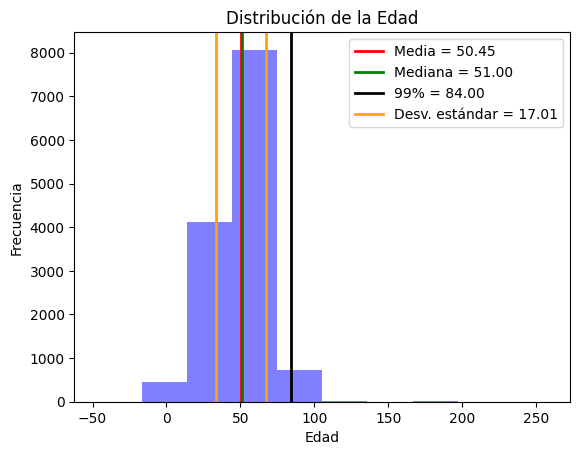

Desviación estándar: 17.0131897257145
Varianza: 289.4486246431574
Rango intercuartil: 21.0
Coeficiente de variación: 33.720674878932364


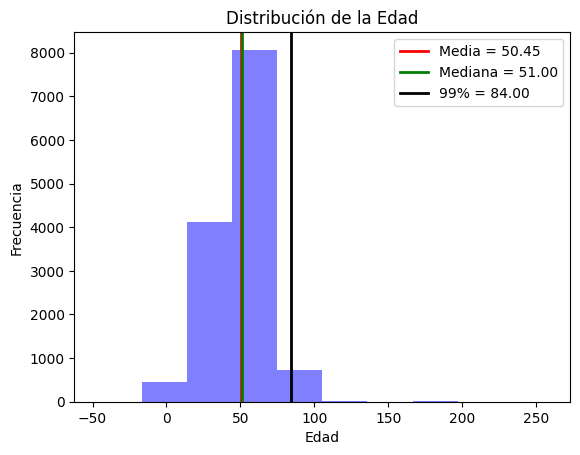

In [4]:
media_edad = np.mean(base["Edad"])
mediana_edad = np.median(base["Edad"])
min_edad = np.min(base["Edad"])
max_edad = np.max(base["Edad"])
rango_edad = max_edad - min_edad
std_edad = np.std(base["Edad"])
p99_edad = np.percentile(base["Edad"], 99)

# Armamos el gráfico
plt.hist(base["Edad"], color='blue', alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Edad")
plt.axvline(media_edad, color='red', linewidth=2, label=f'Media = {media_edad:.2f}')
plt.axvline(mediana_edad, color='green', linewidth=2, label=f'Mediana = {mediana_edad:.2f}')
plt.axvline(p99_edad, color='black', linewidth=2, label=f'99% = {p99_edad:.2f}')

plt.legend()
plt.show()

In [5]:
print(f"La edad mínima es: {min_edad}")
print(f"La edad máxima es: {max_edad}")
print(f"El rango de edad es: {rango_edad}")
print(f"El error standard de edad es: {std_edad:.4f}")


La edad mínima es: -47
La edad máxima es: 258
El rango de edad es: 305
El error standard de edad es: 17.0132


In [6]:
p25_edad = np.percentile(base["Edad"], 25)
p50_edad = np.percentile(base["Edad"], 50)
p60_edad = np.percentile(base["Edad"], 60)
p75_edad = np.percentile(base["Edad"], 75)
p95_edad = np.percentile(base["Edad"], 95)
print(f"El percentil 25 es: {p25_edad}; \nEl percentil 50 es: {p50_edad}; \nEl percentil 60 es: {p60_edad}; \nEl percentil 75 es: {p75_edad}; \nEl percentil 95 es: {p95_edad}; \nEl percentil 99 es: {p99_edad}")

El percentil 25 es: 41.0; 
El percentil 50 es: 51.0; 
El percentil 60 es: 55.0; 
El percentil 75 es: 62.0; 
El percentil 95 es: 75.0; 
El percentil 99 es: 84.0


##  c.	Análisis y aplicación de Medidas de Dispersión.

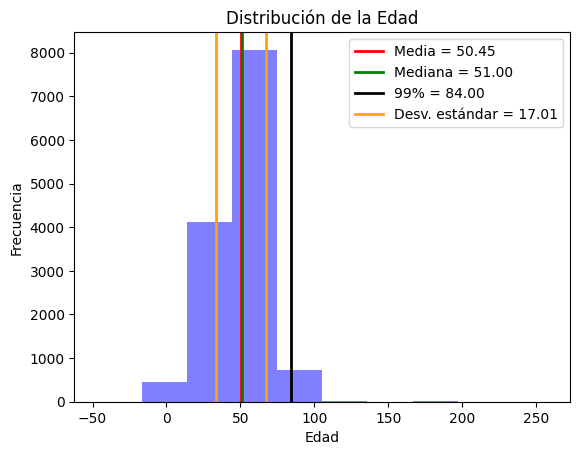

Desviación estándar: 17.0131897257145
Varianza: 289.4486246431574
Rango intercuartil: 21.0
Coeficiente de variación: 33.720674878932364


In [43]:
# Calculamos las medidas de dispersión
std_edad = np.std(base["Edad"])
var_edad = np.var(base["Edad"])
iqr_edad = np.subtract(np.percentile(base["Edad"], 75), np.percentile(base["Edad"], 25))
cv_edad = (std_edad / media_edad) * 100

# Armamos el gráfico
plt.hist(base["Edad"], color='blue', alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Edad")
plt.axvline(media_edad, color='red', linewidth=2, label=f'Media = {media_edad:.2f}')
plt.axvline(mediana_edad, color='green', linewidth=2, label=f'Mediana = {mediana_edad:.2f}')
plt.axvline(p99_edad, color='black', linewidth=2, label=f'99% = {p99_edad:.2f}')
plt.axvline(media_edad + std_edad, color='orange', linewidth=2, label=f'Desv. estándar = {std_edad:.2f}')
plt.axvline(media_edad - std_edad, color='orange', linewidth=2)
plt.legend()
plt.show()

# Imprimimos las medidas de dispersión
print("Desviación estándar:", std_edad)
print("Varianza:", var_edad)
print("Rango intercuartil:", iqr_edad)
print("Coeficiente de variación:", cv_edad)

## d.	Análisis de covarianza entre las variables.

In [45]:
#El análisis de covarianza (ANCOVA) se utiliza para examinar si existe una relación entre una variable dependiente y una variable independiente, mientras se controlan los efectos de otras variables independientes (también conocidas como covariables). La covarianza es una medida de cómo varían conjuntamente dos variables. Si las dos variables tienden a variar juntas (es decir, cuando una variable es alta, la otra también lo es), entonces la covarianza será positiva. Si las dos variables tienden a variar en direcciones opuestas (es decir, cuando una variable es alta, la otra es baja), entonces la covarianza será negativa.

#Para realizar un análisis de covarianza en Python, se puede utilizar la función scipy.stats.linregress() de la biblioteca SciPy. Esta función calcula una regresión lineal simple y devuelve varios valores, incluyendo la covarianza entre las dos variables.

#Supongamos que tenemos un conjunto de datos que contiene dos variables, una variable independiente llamada "X" y una variable dependiente llamada "Y". El siguiente código muestra cómo se puede calcular la covarianza entre las dos variables utilizando scipy.stats.linregress():

from scipy.stats import linregress

# Extraemos los datos de las columnas "Edad" y "superficie"
edad = base["Edad"]
superficie = base["superficie"]

# Calculamos la covarianza entre ambas variables
cov = np.cov(edad, superficie)

# Imprimimos la covarianza
print("Covarianza entre Edad y superficie:")
print(cov[0, 1])

Covarianza entre Edad y superficie:
1.499338012284205


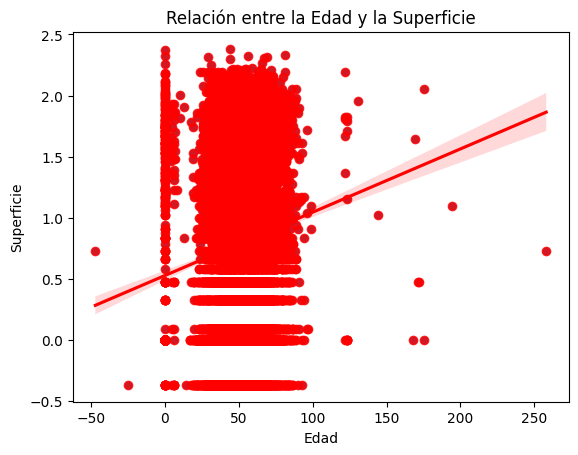

In [46]:
# Diagrama de dispersión
sns.scatterplot(x=base["Edad"], y=base["superficie"])

# Ajuste de la línea de regresión
sns.regplot(x=base["Edad"], y=base["superficie"], color='r')

# Etiquetas de los ejes
plt.xlabel("Edad")
plt.ylabel("Superficie")

# Título del gráfico
plt.title("Relación entre la Edad y la Superficie")

# Mostrar el gráfico
plt.show()

Ya existe un rango etario diseñado en las encuestas en profundidad que se hacen a los grupos y es el que exploraremos a continuación, con intesión de utilizar esa variable en lugar de Edad para la clasificación.

A esa clasificación la mejoramos incorporando un rango con los valores erroneos (menores de 18 y mayores de 100) y categorizando los NaN para poder manipularlos

# Reemplazo de Edad por Rango Etario

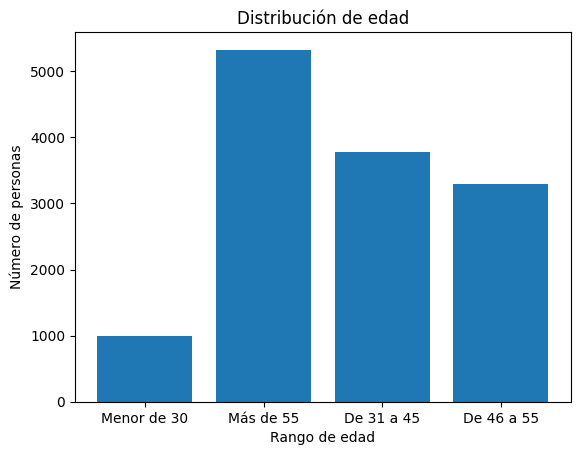

In [7]:
# Exploramos el Rango Etario
counts = base["Rango_etario"].value_counts()

# Crear una lista vacía para las etiquetas
etiquetas = []

# Recorrer los valores de counts y agregar las etiquetas en el orden correcto
for i in base["Rango_etario"]:
    etiquetas.append(counts.loc[i])

# Armamos el gráfico
plt.bar(base["Rango_etario"], etiquetas)
plt.title('Distribución de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Número de personas')
plt.show()

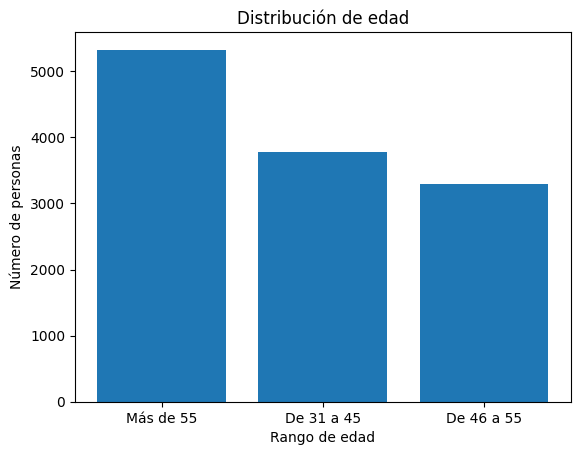

In [8]:
# Eliminar los rangos problemáticos para ver qué nos queda
RangoEdad_tmp = base["Rango_etario"]
RangoEdad_tmp1 = pd.Series(list(filter(lambda x: x != RangoEdad_tmp[0] and x != RangoEdad_tmp[1], RangoEdad_tmp)))
RangoEdad = pd.Series(list(filter(lambda x: x != 'Más de 100', RangoEdad_tmp1))) 

counts = RangoEdad.value_counts()

# Crear una lista vacía para las etiquetas
etiquetas = []

# Recorrer los valores de counts y agregar las etiquetas en el orden correcto
for i in RangoEdad:
    etiquetas.append(counts.loc[i])

# Armamos el gráfico
plt.bar(RangoEdad, etiquetas)
plt.title('Distribución de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Número de personas')
plt.show()


# 2.	PARTE II. Modelado supervisado o No supervisado.

b.	En caso que no supervisado.
i.	Implementar el modelo de acuerdo a las variables de agrupamiento o predictoras que consideren mejor.
ii.	Evaluar cuál es el mejor número de clusters para agrupar el conjunto de datos.


# Clusterización
Comenzamos a investigar los métodos de clasificación. En este caso vamos a usar DBSCAN y KMODES por su habolidad de trabajar con variables categóricas.

# DBSCAN

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np



# Seleccionar las columnas de edad y superficie
base_cat = base["Edad"].values
base_cat = base["superficie"].values

# Combinar las dos columnas en un único array bidimensional
X = np.column_stack((base_cat, base_cat))

# Crear el modelo de clustering
kmeans = KMeans(n_clusters=3, random_state=0)

# Entrenar el modelo
kmeans.fit(X)

# Ver los clusters asignados a cada punto de datos
print(kmeans.labels_)

[0 0 0 ... 1 1 1]


C:\Users\Marian\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
from sklearn.metrics import pairwise_distances

# Calcular la matriz de distancia
distance_matrix = pairwise_distances(X)

# Ajustar los datos y obtener los resultados del clustering
clusters = pd.Series(DBSCAN(eps=3, min_samples=5).fit_predict(distance_matrix))

# No tengo idea de cómo interpretar esto
print(clusters)
DBSCAN_counts = clusters.value_counts()
DBSCAN_counts

0         0
1         0
2         0
3         0
4         1
         ..
13386    22
13387    28
13388     1
13389    -1
13390     1
Length: 13391, dtype: int64


0     2950
1     2939
10     979
9      645
26     633
      ... 
73       6
64       5
72       5
74       5
75       5
Name: count, Length: 77, dtype: int64

In [11]:
# Ejecutar DBSCAN sobre los datos de prueba
db = DBSCAN(eps=0.3, min_samples=2).fit(X)
clusters = db.labels_

# Calcular los resultados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
encoded_base = X
silhouette_score = metrics.silhouette_score(encoded_base, clusters)

# Imprimir resultados
print('Número de clusters: %d' % n_clusters)
print('Número de puntos ruidosos (ruido): %d' % n_noise)
print('Índice de silueta: %0.3f' % silhouette_score)

Número de clusters: 8
Número de puntos ruidosos (ruido): 0
Índice de silueta: 0.386


In [13]:
#import matplotlib.pyplot as plt
#from scipy.cluster import hierarchy


In [14]:
# Calcula la matriz de distancias y crea el linkage
#dist = hierarchy.distance.pdist(encoded_base)
#linkage = hierarchy.linkage(dist, method='ward')

In [ ]:
# Crea el dendrograma y lo guarda en una variable
#dendrogram = hierarchy.dendrogram(linkage, no_plot=True)

In [ ]:
# Crea el mapa de calor con la matriz de datos ordenada según el clustering
#ordered_data = encoded_base[dendrogram['leaves'], :]
#plt.imshow(ordered_data, aspect='auto', cmap='viridis')
#plt.show()

In [ ]:
#sns.clustermap

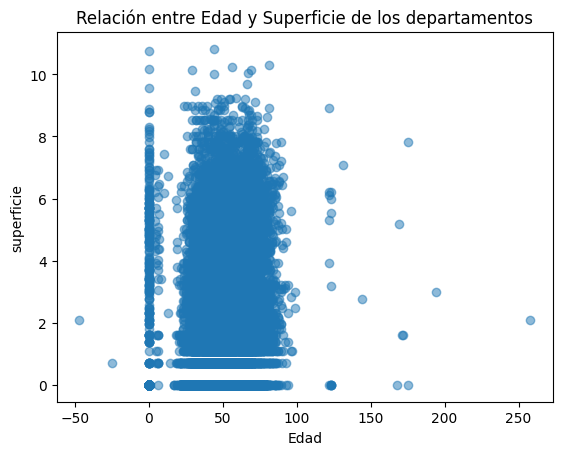

In [21]:
import matplotlib.pyplot as plt

# Definir los valores de las variables X e Y
X = base["Edad"].values
Y = base["superficie"].values

# Crear el gráfico de dispersión
plt.scatter(X, Y, alpha=0.5)

# Añadir etiquetas a los ejes y título al gráfico
plt.xlabel("Edad")
plt.ylabel("superficie")
plt.title("Relación entre Edad y Superficie de los departamentos")

# Mostrar el gráfico
plt.show()

In [28]:
# Transformar el arreglo X en un arreglo bidimensional
X_2d = np.column_stack((X, np.zeros(len(X))))

In [29]:
# Ejecutar DBSCAN sobre los datos de prueba
db = DBSCAN(eps=0.3, min_samples=2).fit(X_2d)
clusters = db.labels_

# Calcular los resultados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
encoded_base = X_2d
silhouette_score = metrics.silhouette_score(encoded_base, clusters)

# Imprimir resultados
print('Número de clusters: %d' % n_clusters)
print('Número de puntos ruidosos (ruido): %d' % n_noise)
print('Índice de silueta: %0.3f' % silhouette_score)

Número de clusters: 91
Número de puntos ruidosos (ruido): 13
Índice de silueta: 0.998


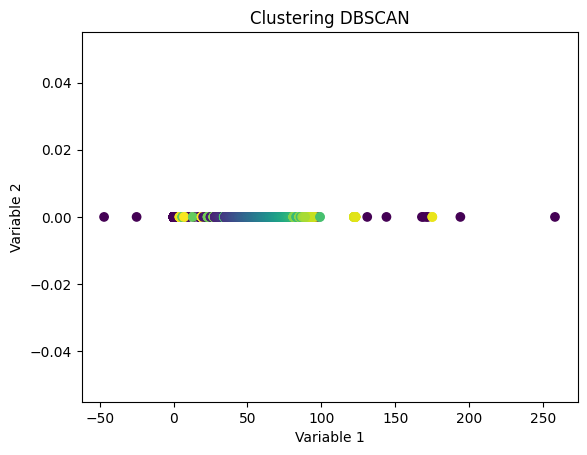

In [30]:
import matplotlib.pyplot as plt

# Crear un scatter plot de los datos con diferentes colores para cada cluster
plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters)

# Configurar el título y los ejes del gráfico
plt.title("Clustering DBSCAN")
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")

# Mostrar el gráfico
plt.show()

C:\Users\Marian\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\Marian\anaconda3\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


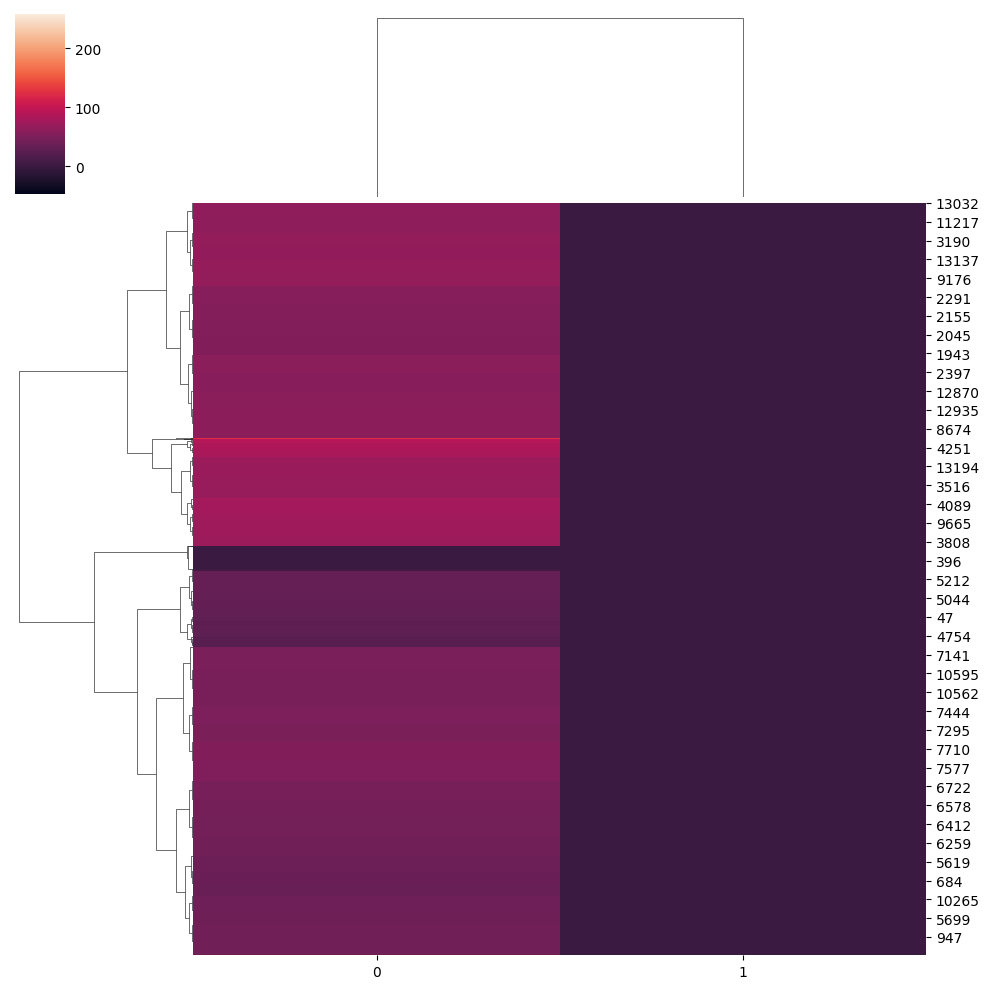

In [31]:
# Crea el mapa de calor con clustering jerárquico
sns.clustermap(encoded_base, method="ward", metric="euclidean")

Número de clusters: 18
Número de puntos ruidosos (ruido): 24
Índice de silueta: 0.049


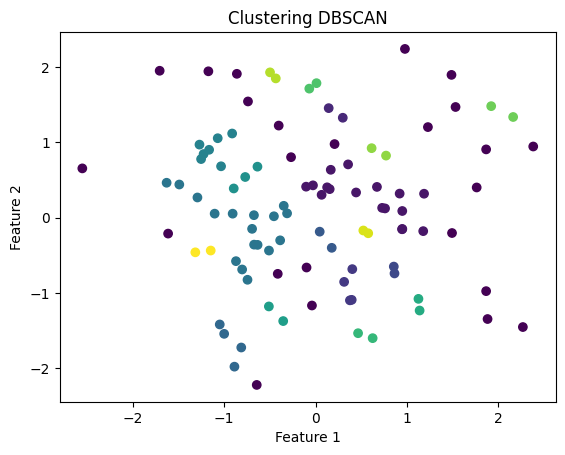

In [32]:
#Este código generará un scatter plot de los datos de prueba con diferentes colores para cada cluster. 
#Los puntos ruidosos (puntos que no pertenecen a ningún cluster) se representan con el color negro. 
#En la parte inferior del gráfico se mostrará el número de clusters, el número de puntos ruidosos y el índice de silueta.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Generar datos de prueba
np.random.seed(0)
X = np.random.randn(100, 2)

# Ejecutar DBSCAN sobre los datos de prueba
db = DBSCAN(eps=0.3, min_samples=2).fit(X)
clusters = db.labels_

# Calcular los resultados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
encoded_base = X
silhouette_score = metrics.silhouette_score(encoded_base, clusters)

# Imprimir resultados
print('Número de clusters: %d' % n_clusters)
print('Número de puntos ruidosos (ruido): %d' % n_noise)
print('Índice de silueta: %0.3f' % silhouette_score)

# Transformar la matriz X en una matriz de columnas
column1 = X[:, 0].reshape(-1, 1)
column2 = X[:, 1].reshape(-1, 1)

# Combinar las dos columnas en una sola matriz
X_2d = np.hstack([column1, column2])

# Crear un scatter plot de los datos con diferentes colores para cada cluster
plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters)

# Configurar el título y los ejes del gráfico
plt.title("Clustering DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Mostrar el gráfico
plt.show()

In [47]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Detectar grupos con DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X_scaled)

# Extraer puntos centrales
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True






import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Generar datos de prueba
np.random.seed(0)
n_samples = 750
X = np.concatenate((np.random.randn(n_samples, 2) * 0.3,
                    np.random.randn(n_samples, 2) * 0.5 + np.array([1, 4]),
                    np.random.randn(n_samples, 2) * 0.2 + np.array([-2, 3]),
                    np.random.randn(n_samples, 2) * 0.2 + np.array([4, -2]),
                    np.random.randn(n_samples, 2) * 0.1 + np.array([-4, -4])))

# Ejecutar DBSCAN sobre los datos de prueba
db = DBSCAN(eps=0.3, min_samples=2).fit(X)
clusters = db.labels_

# Calcular los resultados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
encoded_base = X
silhouette_score = metrics.silhouette_score(encoded_base, clusters)

# Imprimir resultados
print('Número de clusters: %d' % n_clusters)
print('Número de puntos ruidosos (ruido): %d' % n_noise)
print('Índice de silueta: %0.3f' % silhouette_score)

# Graficar los resultados
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Pintar los puntos ruidosos en negro
        col = [0, 0, 0, 1]

    class_member_mask = (clusters == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Número estimado de clusters: %d' % n_clusters)
plt.show()

ValueError: could not convert string to float: 'Edad'